Iris Dataset : Understanding of Dataset.

The data set contains 3 classes with 50 instances each, and 150 instances in total, where each class refers to a type of iris plant.

Class : Iris Setosa,Iris Versicolour, Iris Virginica

The format for the data: (sepal length, sepal width, petal length, petal width)

**Uploading dataset**

In [ ]:
from google.colab import files
file = files.upload()

Saving iris-kmeans.csv to iris-kmeans (3).csv


**Viewing Dataset**

In [ ]:
import pandas as pd
df = pd.read_csv('iris-kmeans.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species-code
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [ ]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species-code
145,146,6.7,3.0,5.2,2.3,Iris-virginica,3
146,147,6.3,2.5,5.0,1.9,Iris-virginica,3
147,148,6.5,3.0,5.2,2.0,Iris-virginica,3
148,149,6.2,3.4,5.4,2.3,Iris-virginica,3
149,150,5.9,3.0,5.1,1.8,Iris-virginica,3


**Elbow Method**

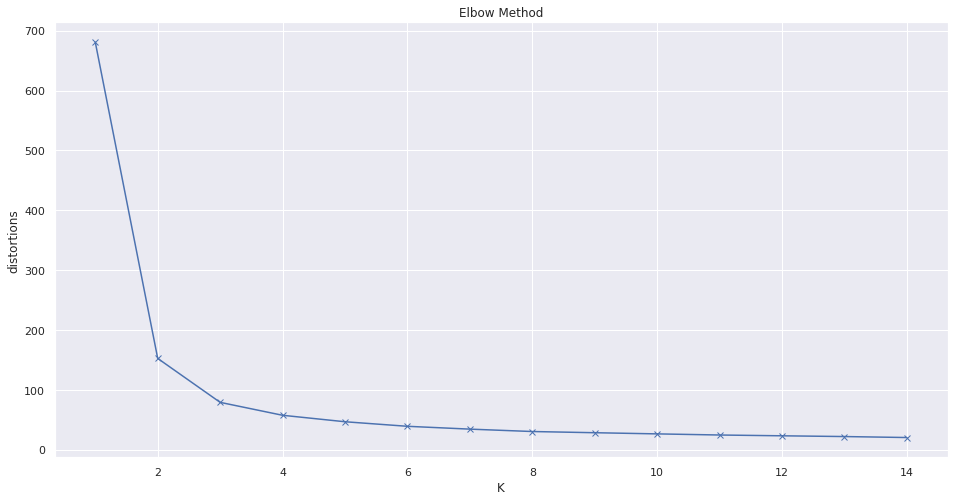

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

distortions = [] # It is the sum of the squared differences between the observations and the corresponding centroid.
K = range(1,15)
for k in K:
  kmeansModel = KMeans(n_clusters=k)
  kmeansModel.fit(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
  distortions.append(kmeansModel.inertia_) # inertia_ is used for to tell us the better quality of no. of clusters

plt.figure(figsize=(16,8))
plt.plot(K,distortions, 'bx-') # bx- is used for that blue line in the graph
plt.xlabel('K')
plt.ylabel('distortions')
plt.title('Elbow Method')
plt.show() 


Here we see it got the last breakage exactly at 3.
After 3 it has a continuous line. So the no. of cluster should be 3.

**Implementing K-Means Algorithm**

In [ ]:
from sklearn.cluster import KMeans # import kmeans

features = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # Declare Features
model = KMeans(n_clusters = 3, init = 'k-means++') # Declare Model  # selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
model.fit(features) 

print(model.labels_) # Labelling cluster no.

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


**Here we see 3 types of labels or clusters.**

**Adding a new labels for k-means clustering**

In [ ]:
x = model.labels_
df['labels'] = x # Adding new column e.g 'labels' in DataFrame
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species-code,labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,1
5,6,5.4,3.9,1.7,0.4,Iris-setosa,1,1
6,7,4.6,3.4,1.4,0.3,Iris-setosa,1,1
7,8,5.0,3.4,1.5,0.2,Iris-setosa,1,1
8,9,4.4,2.9,1.4,0.2,Iris-setosa,1,1
9,10,4.9,3.1,1.5,0.1,Iris-setosa,1,1


**To see the observation or comparison in a subplot** 

Text(0.5, 1.0, 'KMeans')

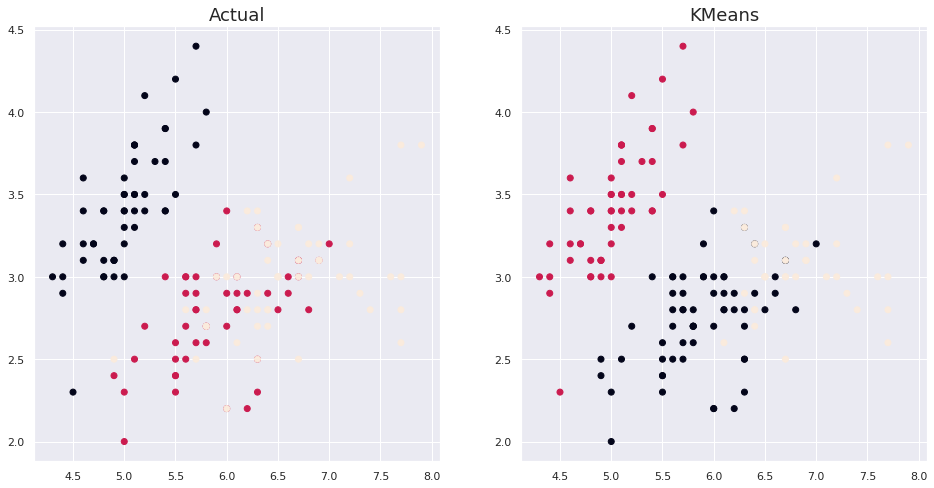

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(16,8)}) # 16 means length and 8 means width of Graph
fig, axes = plt.subplots(1,2,) # 1 means row(Row of graph) and 2 means column

axes[0].scatter(df['SepalLengthCm'], df['SepalWidthCm'], c = df['Species-code'])
axes[0].set_title('Actual', fontsize = 18)

axes[1].scatter(df['SepalLengthCm'], df['SepalWidthCm'], c = df['labels'])
axes[1].set_title('KMeans', fontsize = 18)

Text(0.5, 1.0, 'KMeans')

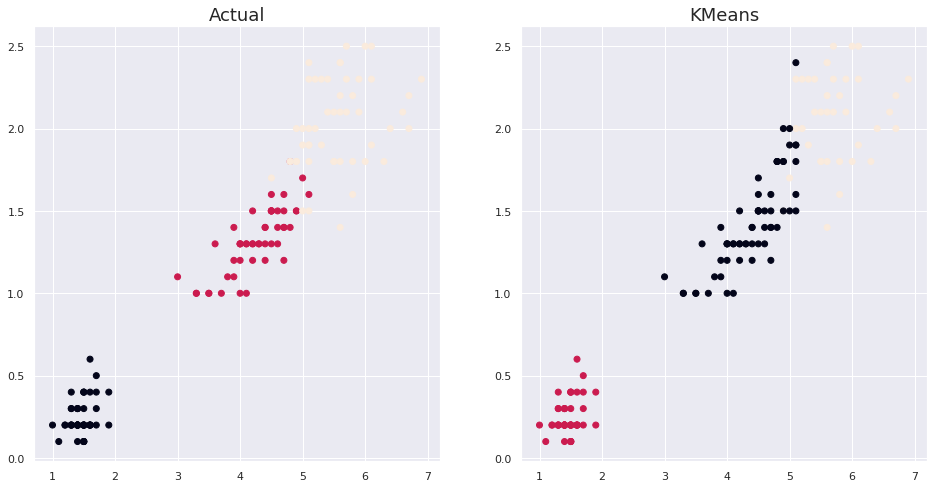

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))

axes[0].scatter(df['PetalLengthCm'], df['PetalWidthCm'], c = df['Species-code'])
axes[0].set_title('Actual', fontsize = 18)

axes[1].scatter(df['PetalLengthCm'], df['PetalWidthCm'], c = df['labels'])
axes[1].set_title('KMeans', fontsize = 18)

**End of training the model**

**The train dataset**

In [ ]:
pd.set_option('display.max_rows', None)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species-code,labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,1
5,6,5.4,3.9,1.7,0.4,Iris-setosa,1,1
6,7,4.6,3.4,1.4,0.3,Iris-setosa,1,1
7,8,5.0,3.4,1.5,0.2,Iris-setosa,1,1
8,9,4.4,2.9,1.4,0.2,Iris-setosa,1,1
9,10,4.9,3.1,1.5,0.1,Iris-setosa,1,1


**Predicting New Data**

In [ ]:
Model.predict([[6.6, 3.4, 4.9, 2.2]])

array([2], dtype=int32)

In [ ]:
Model.predict([[4.9, 3, 1.9, 0.2]])

array([1], dtype=int32)